In [2]:
%cd /content/drive/MyDrive/Data Mining/9. XGBoost & SHAP

/content/drive/MyDrive/Data Mining/9. XGBoost & SHAP


In [3]:
!pip install shap

In [4]:
import pandas as pd
import xgboost as xgb

In [6]:
data = pd.read_csv('car_prices.csv')
data.head()

,Unnamed: 0,Price,Mileage,Cylinder,Doors,Cruise,Sound,Leather,Buick,Cadillac,Chevy,Pontiac,Saab,Saturn,convertible,coupe,hatchback,sedan,wagon
0,1,22661.05,20105,6,4,1,0,0,1,0,0,0,0,0,0,0,0,1,0
1,2,21725.01,13457,6,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0
2,3,29142.71,31655,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0
3,4,30731.94,22479,4,2,1,0,0,0,0,0,0,1,0,1,0,0,0,0
4,5,33358.77,17590,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0


In [7]:
#remove unnamed variable
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,Price,Mileage,Cylinder,Doors,Cruise,Sound,Leather,Buick,Cadillac,Chevy,Pontiac,Saab,Saturn,convertible,coupe,hatchback,sedan,wagon
0,22661.05,20105,6,4,1,0,0,1,0,0,0,0,0,0,0,0,1,0
1,21725.01,13457,6,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0
2,29142.71,31655,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0
3,30731.94,22479,4,2,1,0,0,0,0,0,0,1,0,1,0,0,0,0
4,33358.77,17590,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0


In [10]:
#isolate X and y
X = data.drop(['Price'], axis=1)
y = data['Price']
#
X.head()
#

,Mileage,Cylinder,Doors,Cruise,Sound,Leather,Buick,Cadillac,Chevy,Pontiac,Saab,Saturn,convertible,coupe,hatchback,sedan,wagon
0,20105,6,4,1,0,0,1,0,0,0,0,0,0,0,0,1,0
1,13457,6,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0
2,31655,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0
3,22479,4,2,1,0,0,0,0,0,0,1,0,1,0,0,0,0
4,17590,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0


In [11]:
#Create Train and Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1502)
#
X_test.head()

,Mileage,Cylinder,Doors,Cruise,Sound,Leather,Buick,Cadillac,Chevy,Pontiac,Saab,Saturn,convertible,coupe,hatchback,sedan,wagon
524,22891,6,4,1,1,1,0,0,0,1,0,0,0,0,0,1,0
344,7278,4,4,0,0,0,0,0,1,0,0,0,0,0,0,1,0
45,9795,4,4,1,1,1,0,0,0,0,1,0,0,0,0,1,0
144,14095,8,4,1,0,1,0,1,0,0,0,0,0,0,0,1,0
507,32458,4,4,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [12]:
#Create XGBoost matrices
Train = xgb.DMatrix(X_train, label=y_train)
Test = xgb.DMatrix(X_test, label=y_test)
#

In [15]:
#XGBoost
#Parameters
parameters ={'learing_rate': 0.3,
             'max_depth':6,
             'colsample_bytree': 1,
             'subsample': 1,
             'min_child_weight': 1,
             'gamma': 0,
             'random_state': 1502,
             'eval_metric': 'rmse',
             'objective': 'reg:squarederror'}

In [16]:
#XGBoost Model
model = xgb.train(params = parameters,dtrain = Train, num_boost_round=15, evals = [(Test, 'Price')], verbose_eval = 2)

[0]	Price-rmse:6588.80856
[2]	Price-rmse:3968.85769
[4]	Price-rmse:2913.84400
[6]	Price-rmse:2498.93427
[8]	Price-rmse:2401.58706
[10]	Price-rmse:2344.31185
[12]	Price-rmse:2358.43694
[14]	Price-rmse:2377.79308


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:59:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "learing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


In [17]:
#Predictions
predictions = model.predict(Test)
predictions[:5]

array([18160.904, 12413.571, 30067.799, 41024.098, 11616.288],
      dtype=float32)

In [23]:
#Model assessment
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np
print(round(mean_absolute_error(y_test, predictions),0))
print(round(mean_squared_error(y_test, predictions),0))
print(round(np.sqrt(mean_squared_error(y_test, predictions)),0))

1659.0
5653900.0
2378.0


In [24]:
#SHAP
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

In [28]:
#Local Interpretability
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.loc[144])

In [26]:
X_test.head()

,Mileage,Cylinder,Doors,Cruise,Sound,Leather,Buick,Cadillac,Chevy,Pontiac,Saab,Saturn,convertible,coupe,hatchback,sedan,wagon
524,22891,6,4,1,1,1,0,0,0,1,0,0,0,0,0,1,0
344,7278,4,4,0,0,0,0,0,1,0,0,0,0,0,0,1,0
45,9795,4,4,1,1,1,0,0,0,0,1,0,0,0,0,1,0
144,14095,8,4,1,0,1,0,1,0,0,0,0,0,0,0,1,0
507,32458,4,4,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [27]:
shap_values

array([[-7.3585901e+02,  6.6483240e+02, -2.0314261e+02, ...,
         3.9148674e+01, -8.8986717e+01, -3.6449177e+01],
       [ 1.6649830e+03, -5.1612109e+03, -1.5631328e+02, ...,
         7.8229271e+01, -6.1522247e+01, -9.0022430e+01],
       [ 1.6468630e+03, -2.7259614e+03, -8.4642224e+02, ...,
         4.1053242e+01, -3.3544141e+02, -2.0138626e+00],
       ...,
       [-3.3133591e+02,  1.8553322e+02,  4.7419122e+02, ...,
         2.5011759e+01,  7.2584732e+01, -9.5512680e+01],
       [-8.8778870e+02, -4.0665022e+03,  4.6454031e+02, ...,
         5.6161118e+01,  1.1053788e+02, -1.2359917e+02],
       [-5.6977948e+02,  7.6874646e+02, -2.0279701e+02, ...,
         3.7612511e+01, -9.7661476e+01, -4.0114437e+01]], dtype=float32)

In [30]:
#all individual predictions
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test)

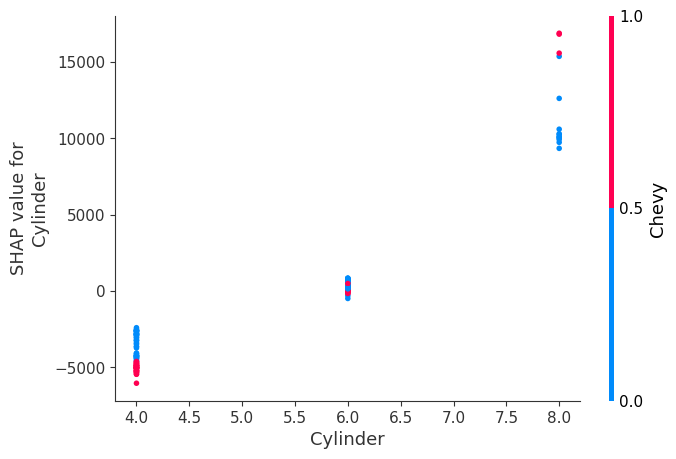

In [32]:
#dependecy plots
shap.dependence_plot('Cylinder', shap_values, X_test)

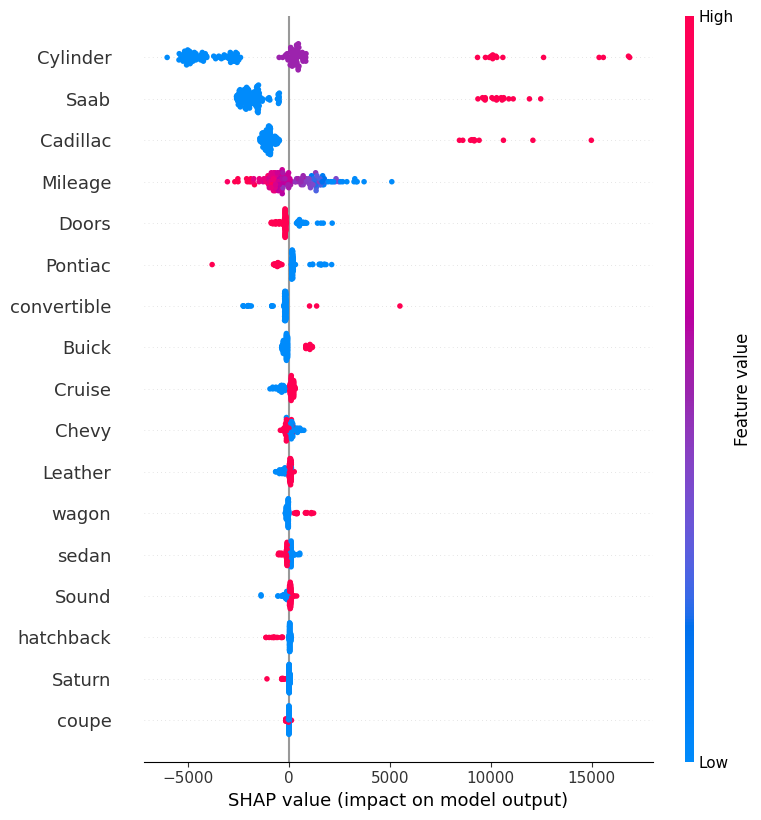

In [33]:
#Summary plot
shap.summary_plot(shap_values, X_test)